# 2. 의사결정나무(Decision Tree)
- 의사결정나무는 의사결정 규칙을 나무 구조로 도표화하여 분류와 예측을 수행하는 분석 방법이다.
- 이는 상대적으로 사용하기 쉽고, 결과 또는 해석이 용이하다.
- 의사결정나무 예시: 검은색과 흰색이 모두 있는 펭귄과 보더콜리 구분하기
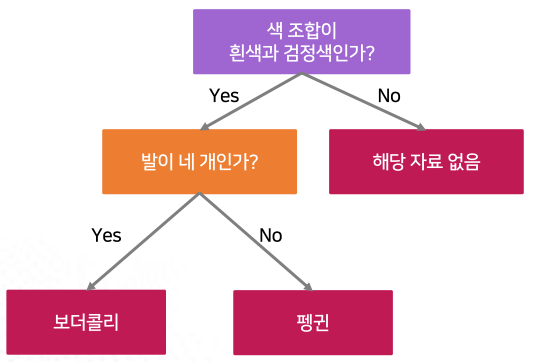
- 의사결정나무 장/단점
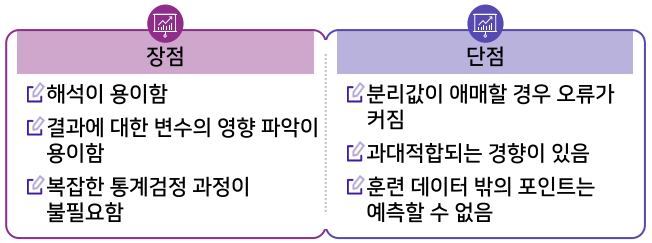
- 의사결정나무 구조: 뿌리마디/중간마디/끝마디
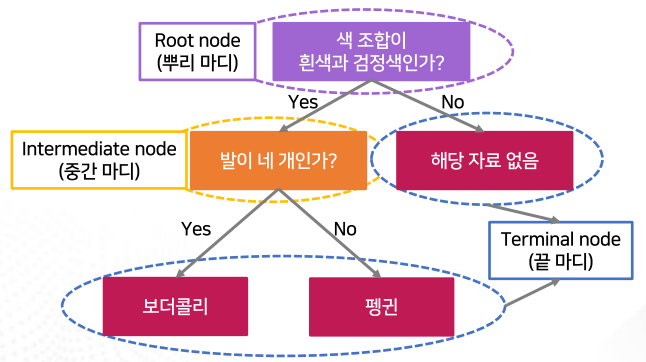
- 의사결정나무 작동 원리
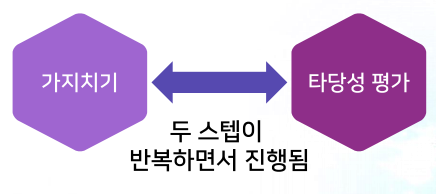
1) 가지치기: 의사결정나무는 모든 데이터가 분류될 때까지 가지를 쳐가면서 분류한다. But, 오류가 커지거나 부적절한 규칙을 적용할 위험이 있다. 따라서, "변수의 오차위험도에 따라 줄여나가는 것"이 중요하다.  
ex) 색조합으로 나누기 VS 다리수로 나누기
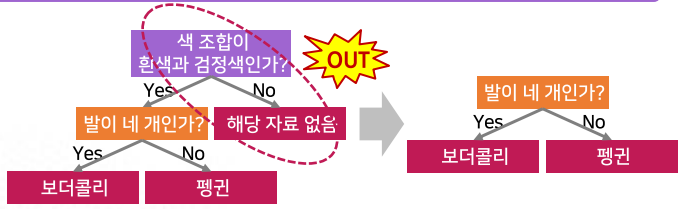
: 두 군집 모두 색상이 같기 때문에 각각의 클래스가 전혀 나누어 지지 않는다. 따라서, 구분이 명확히 되는 다리수로 가치치기를 한다.  
2) 타당성 평가
  - 분류 분석을 시행 후, 해당 모델이 적절한지 판단하는 것
  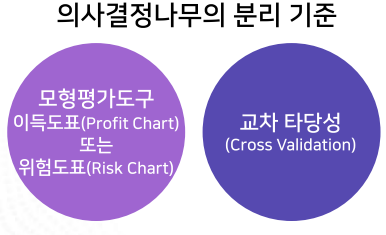
  - 분리 기준: 하나의 특성 변수에서 가지가 뻗어나갈 때 입력변수를 나누게 되는 기준
    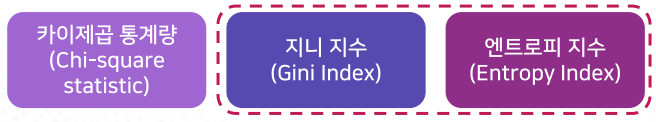
    - 의사결정나무는 '지니지수'를 기본값을 채택하고 있다.  
    
    ① 지니 지수: 데이터 세트를 두번 복원 추출했을 때 동일 범주 개체가 선택될 확률
    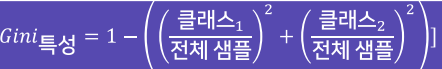
        - 복원 추출: 선택된 샘플들을 다시 모집단에 넣고 다음 번에 복원 추출을 시도할 때 같은 방식으로 샘플을 추출하는 것
        - 지니 지수 그래프
    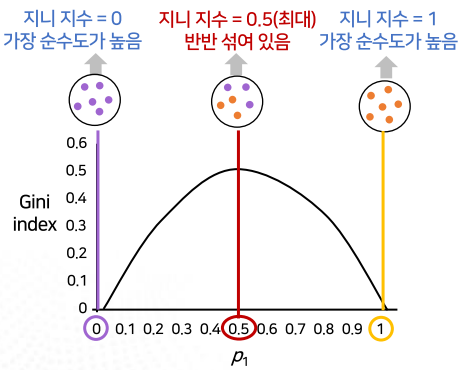
        - 예시: 색조합으로 나눈 경우
    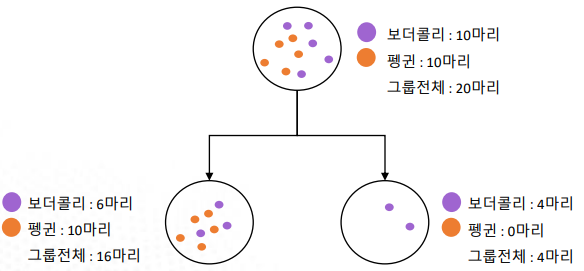
    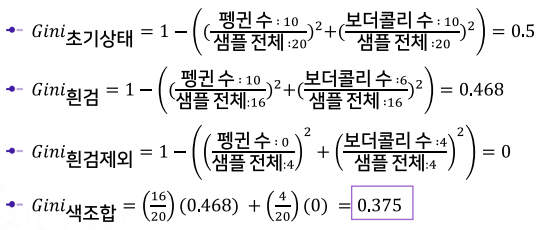
    
    ② 엔트로피: 불순도를 수치화한 지표 중 하나
        - 불순도: 분류하기 어려운 상태이며, 불순한 상태일수록 엔트로피 수치는 커진다.
        - 엔트로피와 불순도는 비례관계이다.
      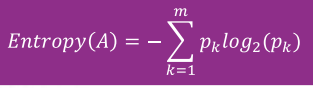
        - 의사결정나무는 각 노드의 순도가 증가하거나 불순도(혹은 불확실성)이 감소하는 방향으로 진행 -> 엔트로피를 이용하여 정보 획득량을 구함
      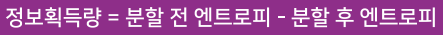
      
    - 지니지수 VS 엔트로피
    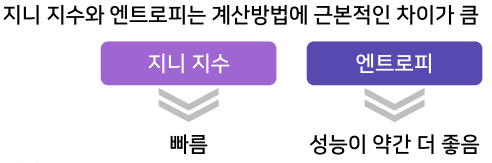

## 2-1. 분류 분석
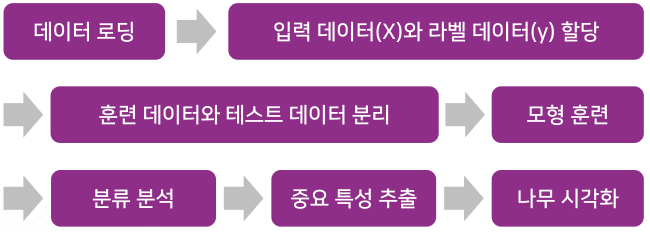

In [2]:
# 모든 결과물 한꺼번에 display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= "all"

In [46]:
# sklearn의 데이터셋에서 iris 데이터를 불러오기
from sklearn.datasets import load_iris # 훈련용으로 들어간 데이터

# load_iris() 함수를 통해 iris 데이터를 불러온다
iris_data = load_iris()

In [47]:
# sklearn 모듈의 model_selection 패키지에서 train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split
# train : test = 75 : 25 로 나누기

# 데이터를 train_set와 test_set으로 나누어 준다
X_train, X_test, y_train, y_test= train_test_split(
    iris_data.data, # array1: 분할시킬 데이터1 = data(특성)을 X로 지정
    iris_data.target, # array2: 분할시킬 데이터2 = target(종류)을 y로 지정
    test_size=0.2, # 테스트 데이터셋의 비율이나 갯수 (나머지는 학습 데이터셋으로 할당)
    random_state=10) # int, RandomState instance or None, default(기본값)=None

> random_state: 데이터를 랜덤으로 추출할 때 여러번 수행하더라도 동일한 샘플을 가져오도록 고정하는 기능을 함.  
    - random_state = none: 기본 값으로, 데이터 세트는 매번 변경되는 것을 야기한다.  
    - random_state = n(정수): 데이터 세트는 매번 변경되는데 교차 검증시 각 모델 별로 훈련 및 테스트 결과 비교를 위해 같은 데이터 세트를 가져와야 하는 경우가 있다. n 값은 어떤 값이든 상관없으나, 같은 데이터 세트를 다른 모델에 적용하려면 random_state를 같은 n 값으로 지정해 주어야 한다.

In [51]:
# Sklearn 패키지에서 Tree 분류기를 불러오자
from sklearn.tree import DecisionTreeClassifier

# Step 2 에서 분리한 훈련 데이터로 모델을 학습시키자
tree_clf = DecisionTreeClassifier() # 의사결정 모형 불러오기
tree_clf.fit(X_train,y_train) # fit = 학습 = 훈련

# Step 4. 분석결과 살펴보기
print("훈련 데이터 점수:", round(tree_clf.score(X_train, y_train), 3))
# 의사결정나무의 분석결과를 살펴본다
print("테스트 데이터 점수:", round(tree_clf.score(X_test, y_test), 3)) # 테스트 점수가 더 중요

DecisionTreeClassifier()

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.967


> 결과 시각화:  
    - 의사결정 나무가 널리 사용되는 이유 중 하나가 결과를 직관적으로 살펴 볼 수 있다는 것이다.  
    - 시각화해서 볼 수 잇는 결과물: '특성 중요도'와 '분류 과정'
    - 시각화 parameter:  
    ① plt.barh(세로_y축,가로_x축): 가로 바 그래프를 그릴 것임을 선언  # 가로기 때문에 x축이 세로  
    ② align = "center": 중앙정렬  
    ③ plt.yticks(세로,이름);: y축에 특성 이름들을 넣어줄 것임을 선언  

In [54]:
# 특성 중요도를 출력해 본다.
print(iris_data.feature_names)
print(tree_clf.feature_importances_) # 분류를 하는데 있어 어떤 특성이 영향을 얼마나 주었는지 보임

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.04210275 0.90945348 0.04844377]


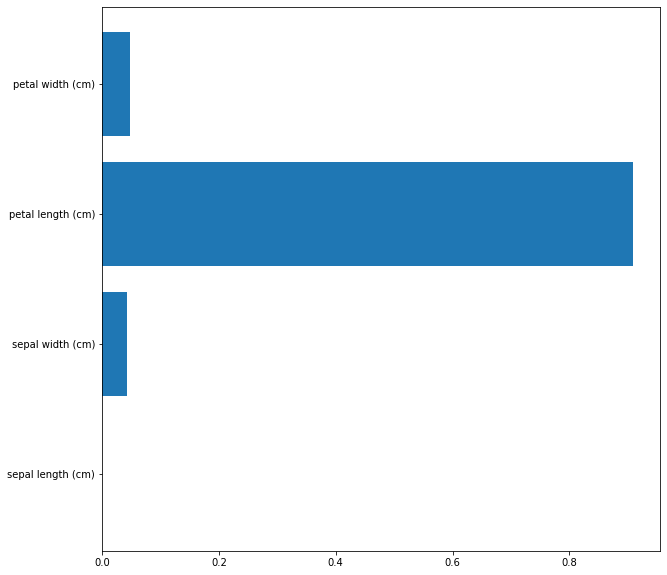

In [55]:
#특성중요도를 시각화 해보자.
import matplotlib.pyplot as plt
import numpy as np
n_features = X_train.shape[1] # 시각화할 특성의 갯수를 정함 # 열의 시각화

plt.barh(np.arange(n_features), tree_clf.feature_importances_, align="center")
plt.yticks(np.arange(n_features), iris_data.feature_names);

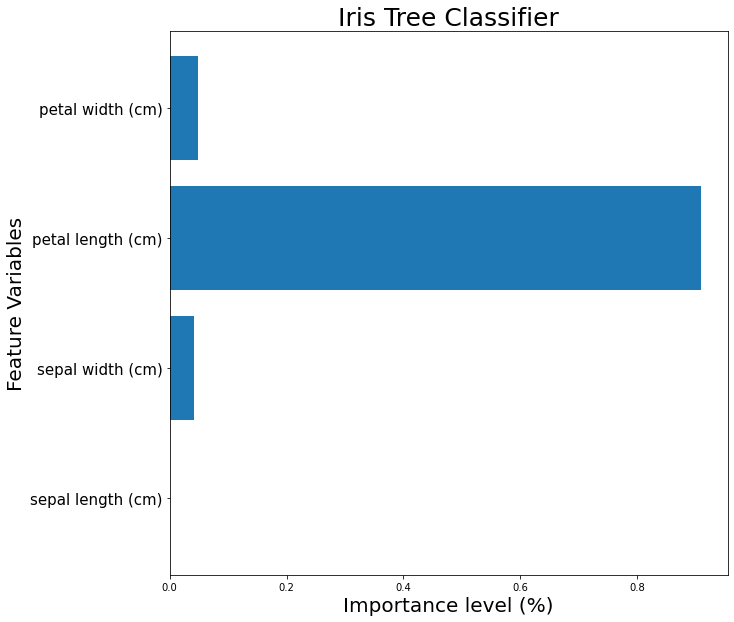

In [56]:
# 특성중요도를 시각화 Customization
plt.barh(np.arange(n_features), tree_clf.feature_importances_, align="center")
plt.yticks(np.arange(n_features), iris_data.feature_names, fontsize=15); # fontsize = y축 글씨 크기

# 바그래프 전체 크기를 조정해 준다
plt.rcParams["figure.figsize"] = (10,10) # plt.rcParams["figure.figsize"] = (가로,세로)

# 제목을 삽입한다. 글자크기=25
plt.title('Iris Tree Classifier', fontsize=25) # plt.title('제목_이름', fontsize=크기)

# 제목을 삽입한다. 글자크기=20
plt.xlabel('Importance level (%)', fontsize=20) # x축: plt.xlabel('x축_이름', fontsize=크기)

# 제목을 삽입한다. 글자크기=20
plt.ylabel('Feature Variables', fontsize=20); # y축: plt.ylabel('y축_이름', fontsize=크기)

<Figure size 1440x1080 with 0 Axes>

[Text(343.38461538461536, 757.1571428571428, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(257.53846153846155, 640.6714285714286, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(429.23076923076917, 640.6714285714286, 'petal length (cm) <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(171.69230769230768, 524.1857142857143, 'petal width (cm) <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(85.84615384615384, 407.7, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(257.53846153846155, 407.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(686.7692307692307, 524.1857142857143, 'petal width (cm) <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(429.23076923076917, 407.7, 'sepal width (cm) <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(343.38461538461536, 291.21428571428567, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(515.0769230769231, 291.21428571428567, 'petal 

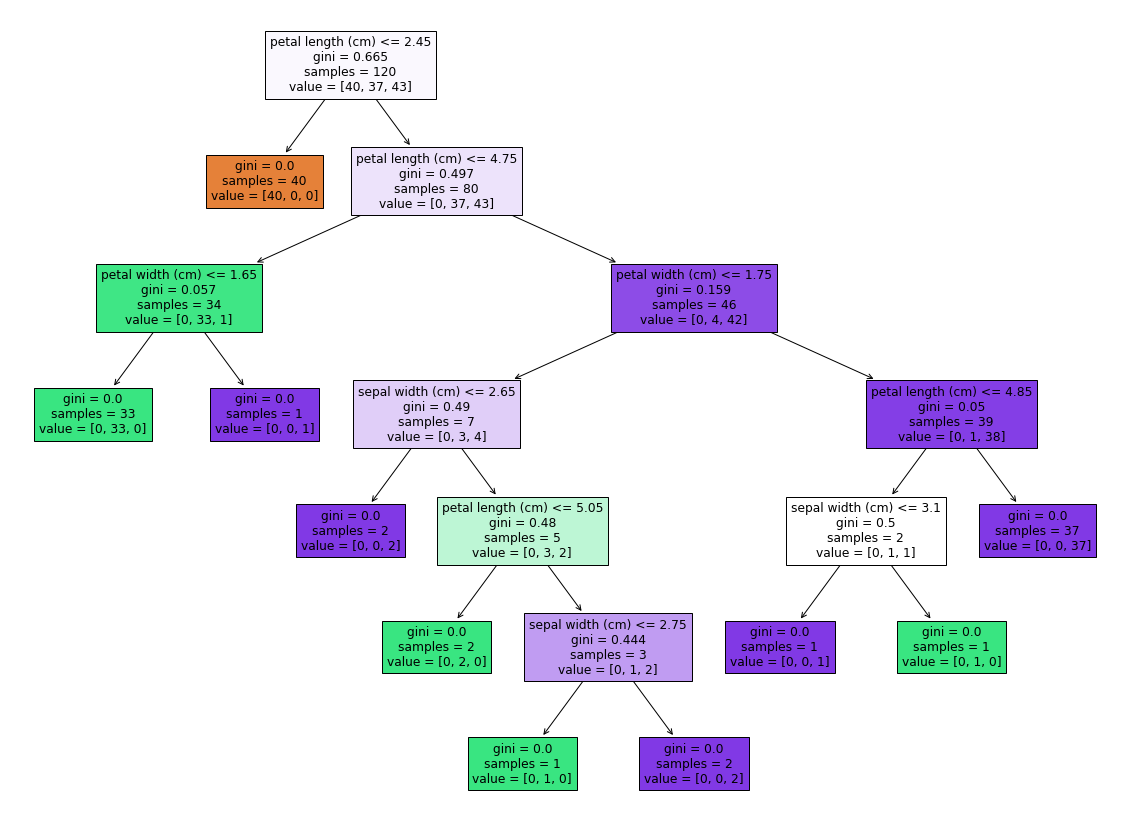

In [57]:
import matplotlib.pyplot as plt

# 나무를 시각화 하기 위해 plot_tree 함수를 불러온다
from sklearn.tree import plot_tree

# 시각화 모형의 전체 크기를 정해준다 (가로,세로)
plt.figure(figsize=(20,15))

# 나무를 시각화 해 준다 (대상모델, 색표현=ok, 특성이름=iris_data의 특성이름)
plot_tree(tree_clf, filled=True, feature_names =iris_data.feature_names)

# 그래프를 출력한다
plt.show()

> 의사결정나무 특징:  
    - 기본적으로 모든 샘플들이 100% 나뉘어질 때까지 계속해서 가지를 뻗어나간다.  
    - 결과적으로 나무가 그려지지만 가지가 아래로 많이 내려갈 수록 복잡해서 이해하기 힘듦 = 직관적인 해석이 의사결정나무의 최대 장점인데 장점이 무색해짐  
    - 나무의 세부 파아미터 값을 조절하여 최대 가지수 약 3개로 제한하는 것이 좋다,  

In [58]:
# 가지의 깊이를 의미하는 max_depth옵션을 3으로 설정한다
tree_clf = DecisionTreeClassifier(max_depth=3) # 최대 가지수: max_depth = 몇 개
tree_clf.fit(X_train,y_train) # 훈련

# 의사결정나무의 분석결과를 살펴본다
print("훈련 데이터 점수:", round(tree_clf.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(tree_clf.score(X_test, y_test), 3))

# 아래 보면 가지를 끝가지 뻗어나가지 못해 훈련 점수 및 테스트 점수가 감소한 것을 볼 수 있다
# 그러나 이는 '트레이드 오프'로 분석가가 결정해야 하는 부분이다

DecisionTreeClassifier(max_depth=3)

훈련 데이터 점수: 0.967
테스트 데이터 점수: 0.933


<Figure size 1440x1080 with 0 Axes>

[Text(418.5, 713.475, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(279.0, 509.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(558.0, 509.625, 'petal length (cm) <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(279.0, 305.775, 'petal width (cm) <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(139.5, 101.92499999999995, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(418.5, 101.92499999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(837.0, 305.775, 'petal width (cm) <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(697.5, 101.92499999999995, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(976.5, 101.92499999999995, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

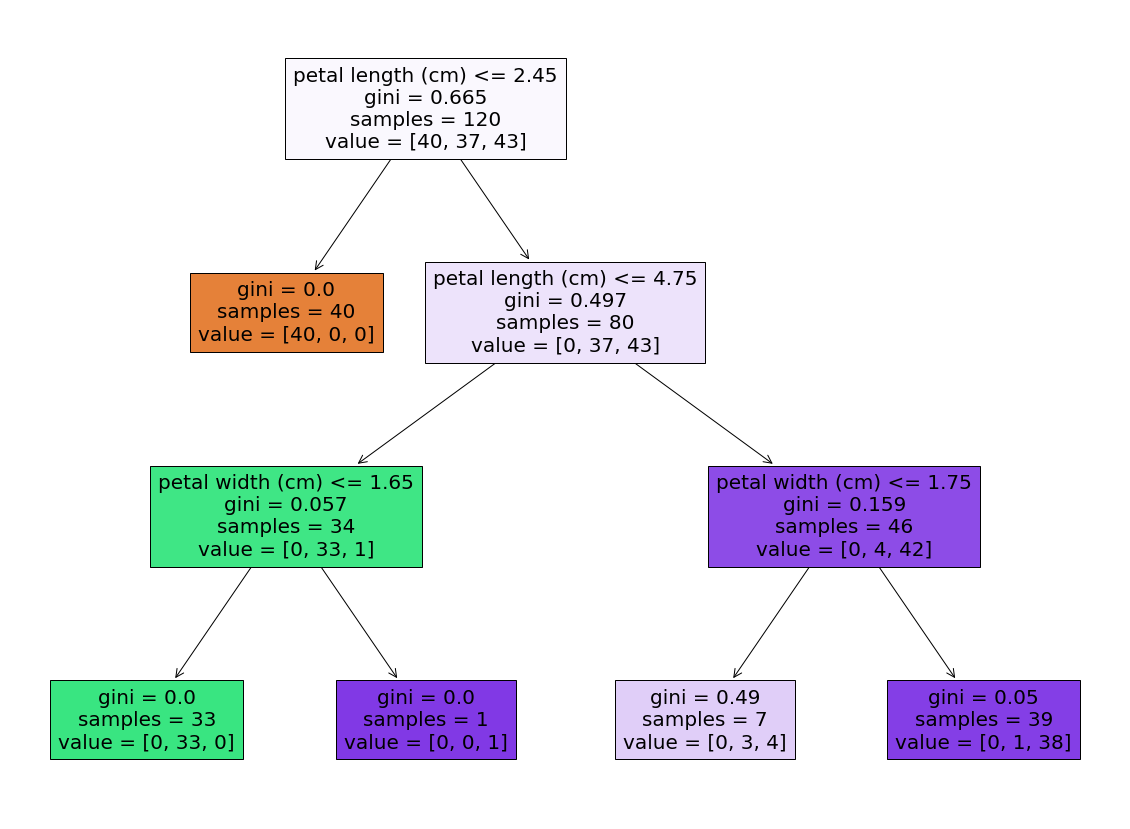

In [59]:
#시각화 모형의 전체 크기를 정해준다 (가로, 세로)
plt.figure(figsize=(20,15))

#나무를 시각화 해 준다 (대상모델, 색표현=ok, 특성이름=iris_data의 특성이름)
plot_tree(tree_clf, filled=True, feature_names =iris_data.feature_names)

#그래프를 출력한다
plt.show()

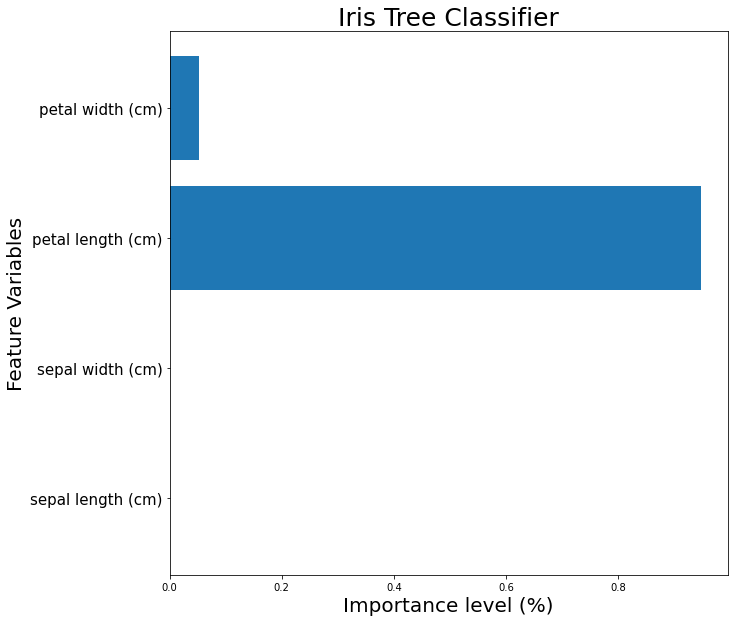

In [61]:
# 특성의 중요도 역시 달라진 것을 볼 수 있다.
n_features = X_train.shape[1]

plt.barh(np.arange(n_features), tree_clf.feature_importances_, align="center")
plt.yticks(np.arange(n_features), iris_data.feature_names, fontsize=15);

# 바그래프 전체 크기를 조정해 준다
plt.rcParams["figure.figsize"] = (10,10)

# 제목을 삽입한다. 글자크기=25
plt.title('Iris Tree Classifier', fontsize=25) 

# 제목을 삽입한다. 글자크기=20
plt.xlabel('Importance level (%)', fontsize=20)

# 제목을 삽입한다. 글자크기=20
plt.ylabel('Feature Variables', fontsize=20);

## 2-2. 회기 분석
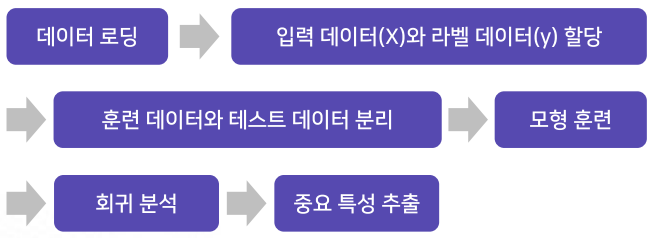

> BOSTON Dataset: 1978년 미국 보스턴의 주택 가격 데이터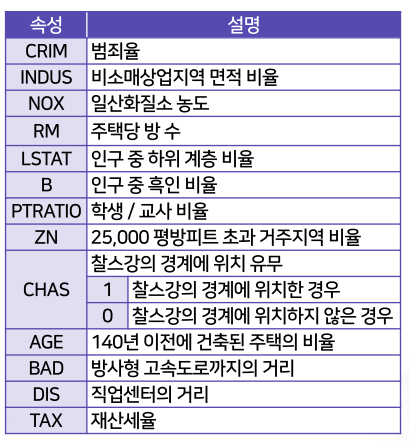

In [65]:
# sklearn의 데이터셋에서 iris 데이터를 불러오기
from sklearn.datasets import load_boston # 훈련용으로 들어간 데이터

# load_iris() 함수를 통해 iris 데이터를 불러온다
boston_data = load_boston()

In [68]:
#sklearn 모듈의 model_selection 패키지에서 train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split

# 데이터를 train_set와 test_set으로 나누어 준다
X_train, X_test, y_train, y_test= train_test_split(
    boston_data.data,
    boston_data.target,
    test_size=0.2,
    random_state=10)

In [77]:
# Sklearn 패키지에서 Tree 분류기를 불러오자
from sklearn.tree import DecisionTreeRegressor # 회기 분석 모델

# Step 2 에서 분리한 훈련 데이터로 모델을 학습시키자
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

# 훈련 결과를 살펴본다
print("훈련 데이터 점수:", round(tree_reg.score(X_train, y_train), 3))
# 의사결정나무의 분석결과를 살펴본다
print("테스트 데이터 점수:", round(tree_reg.score(X_test, y_test), 3))

DecisionTreeRegressor()

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.651


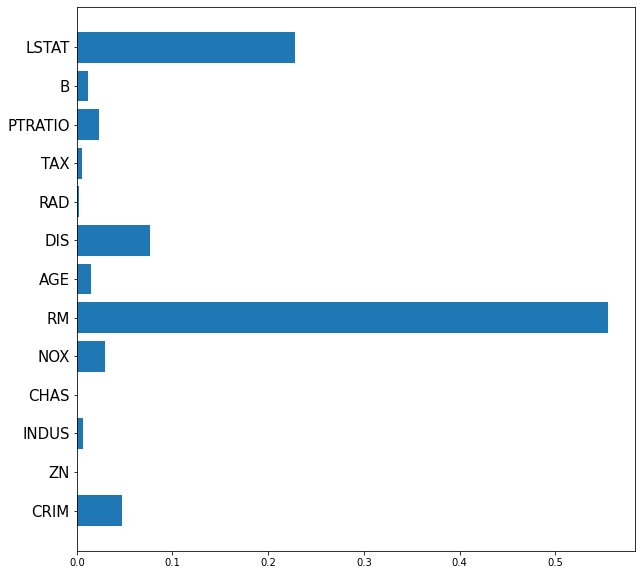

In [79]:
# 특성의 중요도 역시 달라진 것을 볼 수 있다.
n_features = X_train.shape[1]

plt.barh(np.arange(n_features), tree_reg.feature_importances_, align="center")
plt.yticks(np.arange(n_features), boston_data.feature_names, fontsize=15);

In [81]:
# Sklearn 패키지에서 Tree 분류기를 불러오자
from sklearn.tree import DecisionTreeRegressor

# Step 2 에서 분리한 훈련 데이터로 모델을 학습시키자
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X_train,y_train)

# 훈련 결과를 살펴본다
print("훈련 데이터 점수:", round(tree_reg.score(X_train, y_train), 3))
# 의사결정나무의 분석결과를 살펴본다
print("테스트 데이터 점수:", round(tree_reg.score(X_test, y_test), 3))

DecisionTreeRegressor(max_depth=4)

훈련 데이터 점수: 0.889
테스트 데이터 점수: 0.724


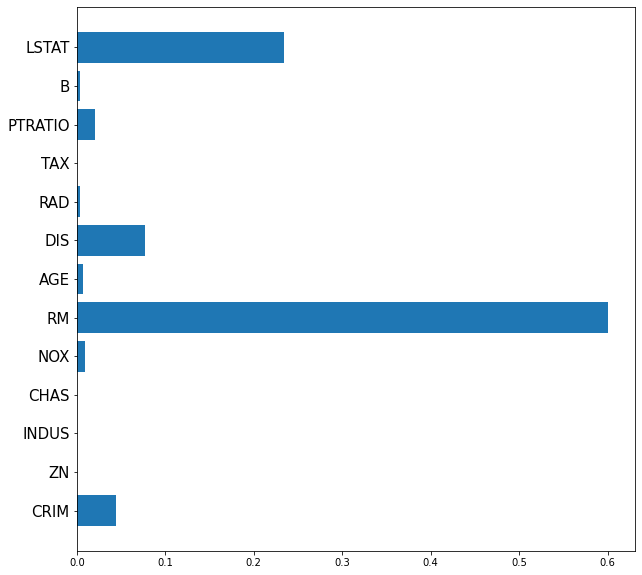

In [82]:
# 특성의 중요도 역시 달라진 것을 볼 수 있다.
n_features = X_train.shape[1]

plt.barh(np.arange(n_features), tree_reg.feature_importances_, align="center")
plt.yticks(np.arange(n_features), boston_data.feature_names, fontsize=15);

실습) WINE Dataset을 이용하여 회기 분석하기

In [83]:
# sklearn의 데이터셋에서 wine 데이터를 불러오기
from sklearn.datasets import load_wine

# load_wine() 함수를 통해 wine 데이터를 불러온다
wine_data = load_wine()

In [84]:
#sklearn 모듈의 model_selection 패키지에서 train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split  

# 데이터를 train_set와 test_set으로 나누어 준다
X_train, X_test, y_train, y_test= train_test_split(
    wine_data.data,
    wine_data.target,
    test_size=0.2,
    random_state=10)

In [87]:
# Sklearn 패키지에서 Tree 분류기를 불러오자
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 분석을 실시한다
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)

print("훈련 데이터 점수:", round(tree_clf.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(tree_clf.score(X_test, y_test), 3))

DecisionTreeClassifier(max_depth=3)

훈련 데이터 점수: 0.986
테스트 데이터 점수: 0.944


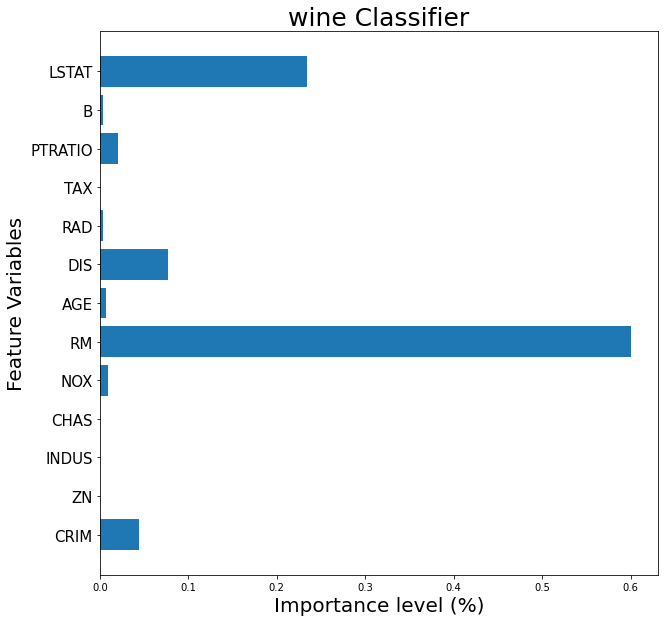

In [89]:
# 특성의 중요도 역시 달라진 것을 볼 수 있다.
n_features = X_train.shape[1]

plt.barh(np.arange(n_features), tree_reg.feature_importances_, align="center")
plt.yticks(np.arange(n_features), boston_data.feature_names, fontsize=15);

#바그래프의 크기를 조정해 준다
plt.rcParams["figure.figsize"] = (10,20)

#제목을 삽입한다. 글자크기=25
plt.title('wine Classifier', fontsize=25)

#제목을 삽입한다. 글자크기=20
plt.xlabel('Importance level (%)', fontsize=20)

#제목을 삽입한다. 글자크기=20
plt.ylabel('Feature Variables', fontsize=20);